# Illinois Men's Gymnastics Strength Test Analysis

## Introduction

A collaborative venture with coach Mike Freeze of the University of Illinois, this is an in-depth analysis of the Illini Men's Gymnastics athletes strength test performance over summer training camp in July 2023. Focusing on two tests, Drop Jumps and Isometric Mid-Thigh Pulls, we leveraged the Hawkin Dynamics system to gather multifaceted data beyond force output to better understand strength trends over time and develop actionable training recommendations to elevate athletic performance for important meets. 

In this initial analysis, the emphasis is on identifying the influential factors that predict force output, aiming to better recognize signs of strain or over-training among athletes.

## Data

Importing the dataset below.

In [137]:
# imports
import pandas as pd
import numpy as np
import glob, os

import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# read data files
folder_path_DJ = 'Drop Jump Data'
folder_path_ISO = 'Isometric Test Data' 
csv_files_DJ = glob.glob(os.path.join(folder_path_DJ, '*.csv'))
csv_files_ISO = glob.glob(os.path.join(folder_path_ISO, '*.csv'))

# generate test dataframes
DJ = pd.concat((pd.read_csv(file) for file in csv_files_DJ), ignore_index = True)
ISO = pd.concat((pd.read_csv(file) for file in csv_files_ISO), ignore_index = True)

In [48]:
# preview
DJ.head()
ISO.head()

,TestId,Date,Time,Name,Segment,Position,Type,Excluded,Tags,System Weight,...,Net Force at 250 ms,Relative Force at 250 ms,Relative Force at 250 ms (BW),RFD 0-250 ms,Left Force at 250 ms,Right Force at 250 ms,Impulse 0-250ms,Net Impulse 0-250ms,Length of Pull,Time to Peak Force
0,uoQyU9SpPmzu1Zj69KI2,07/31/2023,08:44:30,Amari Sewell,NaN,All-Around,Isometric Test,NaN,Mid-Thigh Pull,967.249,...,949.751,198.1910,289.7254,3656,948,969,368.6425,127.3139,2.540,1.698
1,B1SU3xGanPbCmJ9gO0wN,07/31/2023,08:48:28,Brandon Dang,NaN,AA,Isometric Test,NaN,Mid-Thigh Pull,845.925,...,595.075,170.3461,243.5607,2288,704,737,291.7095,80.6512,2.389,2.368
2,mBwLS2x05dnO3tDe9L62,07/31/2023,08:46:47,Connor McCool,NaN,"Floor, Vault",Isometric Test,NaN,Mid-Thigh Pull,1068.410,...,1120.590,204.8839,263.1965,4328,1142,1047,373.7395,107.1712,2.526,1.706
3,OC8egB9Bm2yAwanpEIGc,07/31/2023,08:53:21,Connor Micklos,NaN,All-Around,Isometric Test,NaN,Mid-Thigh Pull,899.871,...,342.129,138.0198,195.2677,1288,710,532,324.7280,100.2102,2.559,1.523
4,YgNQxOyJnHbHAkwcG0RS,07/31/2023,08:45:13,Dylan Shepard,NaN,AA,Isometric Test,NaN,Mid-Thigh Pull,828.102,...,528.898,163.8687,231.2807,1956,692,665,311.9760,105.3646,2.318,2.121


Viewing all the variables next.

In [49]:
# columns
print("Drop Jump Variables:", DJ.columns)
print("Isometric Test Variables:", ISO.columns)

Drop Jump Variables: Index(['TestId', 'Date', 'Time', 'Name', 'Segment', 'Position', 'Type',
       'Excluded', 'Tags', 'System Weight', 'Drop Height', 'Jump Height',
       'Spring Like Correlation', 'Impact Peak', 'Time to Peak Braking Force',
       'Stiffness', 'mRSI', 'RSI', 'Jump Momentum', 'Peak Braking Force',
       'Peak Relative Braking Force', 'Avg. Braking Force',
       'Avg. Relative Braking Force', 'Braking Impulse',
       'Relative Braking Impulse', 'Braking Net Impulse',
       'Relative Braking Net Impulse', 'Peak Propulsive Force',
       'Peak Relative Propulsive Force', 'Avg. Propulsive Force',
       'Avg. Relative Propulsive Force', 'Propulsive Impulse',
       'Relative Propulsive Impulse', 'Propulsive Net Impulse',
       'Relative Propulsive Net Impulse', 'Braking Phase', 'Braking Phase %',
       'Propulsive Phase', 'Propulsive Phase %', 'Time To Takeoff',
       'Flight Time', 'Contact Time', 'Positive Impulse',
       'Positive Net Impulse', 'Net Impulse 

Viewing the variable lists shows the tests measure key metrics and variations of those measures - knowing the individual factors in each test is beneficial during the modeling process. 

**Drop Jump Measures and Variables** 

The drop jump test is designed to test reactivity. The athlete begins by standing on a platform behind the force plates, stepping off and dropping onto the plates, absorbing the drop and immediately leaping again. The goal is to measure how fast the athlete shifts from force absorption to propulsion. Target metrics include Jump Height and Reactive Strength Index (RSI).

The variables can be categorized into phases of the test -

Identifiers 

* `TestId`
* `Date`
* `Time`
* `Name`
* `Type`


DROP Phase - lasts from test start until athlete contacts the plates

General Measurements

* `System Weight`
* `Drop Height`
* `Jump Height`

Braking phase - begins immediately after contact with plates. Consists of athlete loading force onto their legs in preparation for taking off (eccentric)

* Braking Force -  `Avg. Braking Force`, `Avg. Relative Braking Force`, `Avg. Braking RFD`, `Left Avg. Braking RFD`, `Right Avg. Braking RFD`, `L|R Peak Braking Force`, `L|R Avg. Braking Force`, `L|R Avg. Braking RFD`, `Right Force at Peak Braking Force`, `Left Force at Peak Braking Force`, `Time to Peak Braking Force`
* Braking Impulse - `Braking Impulse`, `Relative Braking Impulse`, `Braking Net Impulse`, `Relative Braking Net Impulse`, `L|R Braking Impulse Index`
* Braking Velocity - `Avg. Braking Velocity`
* Braking Power - `Avg. Braking Power`, `Avg. Relative Braking Power`, `Peak Braking Power`, `Peak Relative Braking Power`
* Braking Phase Timing - `Braking Phase`, `Braking Phase %`

Propulsive phase - starts when velocity hits 0 on the plates and continues until the athlete takes off (concentric)

* Propulsive Force - `Avg. Propulsive Force`, `Avg. Relative Propulsive Force`, `L|R Peak Propulsive Force`, `L|R Avg. Propulsive Force`
* Propulsive Impulse - `Propulsive Impulse`, `Relative Propulsive Impulse`, `Propulsive Net Impulse`, `Relative Propulsive Net Impulse`, `L|R Propulsive Impulse Index`
* Propulsive Velocity - `Avg. Propulsive Velocity`
* Propulsive Power - `Avg. Propulsive Power`, `Avg. Relative Propulsive Power`, `Avg. Relative Propulsive Power`, `Peak Relative Propulsive Power`
* Propulsive Phase Timing - `Propulsive Phase`, `Propulsive Phase %`
* `Time to Takeoff`
* `Contact Time`
* Reactive Strength Index - `mRSI`, `RSI`

Flight phase - segment of the test for which athlete is airborne after the drop jump

* `Takeoff Velocity`
* `Flight Time`

Landing phase - athlete lands back on the plate after the jump

* Landing Force - `Avg. Landing Force`, `Relative Peak Landing Force`, `L|R Peak Landing Force`, `L|R Avg. Landing Force`, `Left Force at Peak Landing Force`, `Right Force at Peak Landing Force`
* Landing Impulse - `L|R Landing Impulse Index`

Stability

* `Impact Peak`
* `Stiffness`
* `Spring Like Correlation`
* `Countermovement Depth`
* `Jump Momentum`

Other

* `Segment`
* `Position`
* `Excluded`
* `Tags`

**Isometric Test Measures and Variables**

The isometric mid-thigh pull test is designed to measure absolute force production, as research shows max isometric force is greater than max concentric force production. The test is set up with the athlete on the force plates gripping the bar. They then pull the bar to mid-thigh height and hold the position for 3 seconds. To measure how rapidly the athlete can reach max force, target metrics such as Rate of Force Development (RFD) are considered alongside Peak Force.

The measures is divided into 50ms phases - 

Identifiers

* `TestId`
* `Date`
* `Time`
* `Name`

General Measurements 

* `System Weight`
* `Length of Pull`

Force

* Peak Force - `Peak Force`, `Net Peak Force`, `Relative Peak Force`, `Relative Peak Force (BW)`, `L|R Peak Force`, `Left Peak Force`, `Right Peak Force`
* Force at 0 ms - `Force at 0 ms`, `Net Force at 0 ms`, `Relative Force at 0 ms`, `Relative Force at 0 ms (BW)`, `Left Force at 0 ms`, `Right Force at 0 ms`
* Force at 50 ms - `Force at 50 ms`, `Net Force at 50 ms`, `Relative Force at 50 ms`, `Relative Force at 50 ms (BW)`, `Left Force at 50 ms`, `Right Force at 50 ms`
* Force at 100 ms - `Force at 100 ms`, `Net Force at 100 ms`, `Relative Force at 100 ms`, `Relative Force at 100 ms (BW)`, `Left Force at 100 ms`, `Right Force at 100 ms`
* Force at 150 ms - `Force at 150 ms`, `Net Force at 150 ms`, `Relative Force at 150 ms`, `Relative Force at 150 ms (BW)`, `Left Force at 150 ms`, `Right Force at 150 ms`
* Force at 200 ms - `Force at 200 ms`, `Net Force at 200 ms`, `Relative Force at 200 ms`, `Relative Force at 200 ms (BW)`, `Left Force at 200 ms`, `Right Force at 200 ms`
* Force at 250 ms - `Force at 250 ms`, `Net Force at 250 ms`, `Relative Force at 250 ms`, `Relative Force at 250 ms (BW)`, `Left Force at 250 ms`, `Right Force at 250 ms`

Rate of Force Development and Impulse

* `Time to Peak Force`
* RFD 0-50 ms - `RFD 0-50 ms`, `Impulse 0-50ms`, `Net Impulse 0-50ms`
* RFD 0-100 ms - `RFD 0-100 ms`, `Impulse 0-100ms`, `Net Impulse 0-100ms`
* RFD 0-150 ms - `RFD 0-150 ms`, `Impulse 0-150ms`, `Net Impulse 0-150ms`
* RFD 0-200 ms - `RFD 0-200 ms`, `Impulse 0-200ms`, `Net Impulse 0-200ms`
* RFD 0-250 ms - `RFD 0-250 ms`, `Impulse 0-250ms`, `Net Impulse 0-250ms`

Other

* `Initiation Threshold`
* `Segment`
* `Position`
* `Excluded`
* `Tags`


## EDA

Visualizing the team progress in the target metrics for each test first:

**Drop Jump** - `Jump Height`, `RSI`

**Isometric Test** - `Peak Force`, `Average RFD`

In [122]:
# date time formatting
DJ['Date'] = pd.to_datetime(DJ['Date'])
ISO['Date'] = pd.to_datetime(ISO['Date'])
DJ = DJ.sort_values(by = 'Date')
ISO = ISO.sort_values(by = 'Date')

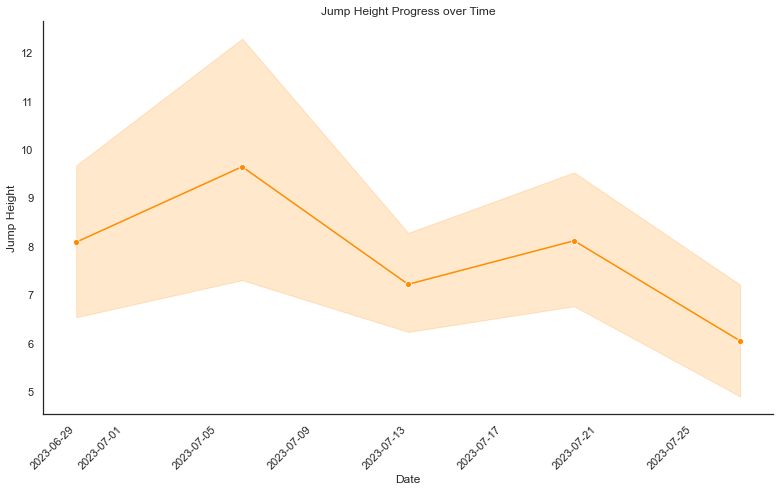

In [135]:
# jump height visual
sns.set(style = "white")
plt.figure(figsize = (11, 7))

ax = sns.lineplot(x = 'Date', y = 'Jump Height', data = DJ, marker = "o", color = "darkorange")

sns.despine()

plt.xlabel('Date')
plt.ylabel('Jump Height')
plt.title('Jump Height Progress over Time')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

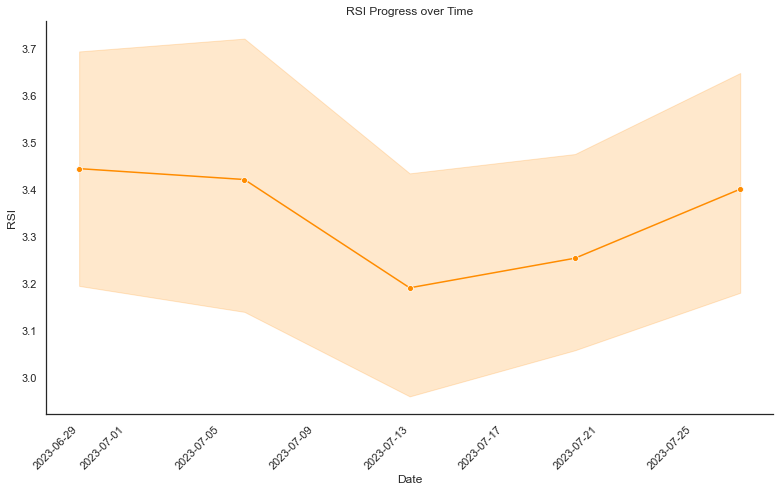

In [124]:
# RSI visual
sns.set(style="white")
plt.figure(figsize=(11, 7))

ax = sns.lineplot(x='Date', y='RSI', data=DJ, marker='o', color = "darkorange")

sns.despine()

plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('RSI Progress over Time')
plt.xticks(rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()

Observing mean `Jump Height` and `RSI` over testing dates shows the athletes' performance generally peaked at the start of July, though RSI recovered to near-peak levels by the end of the month.

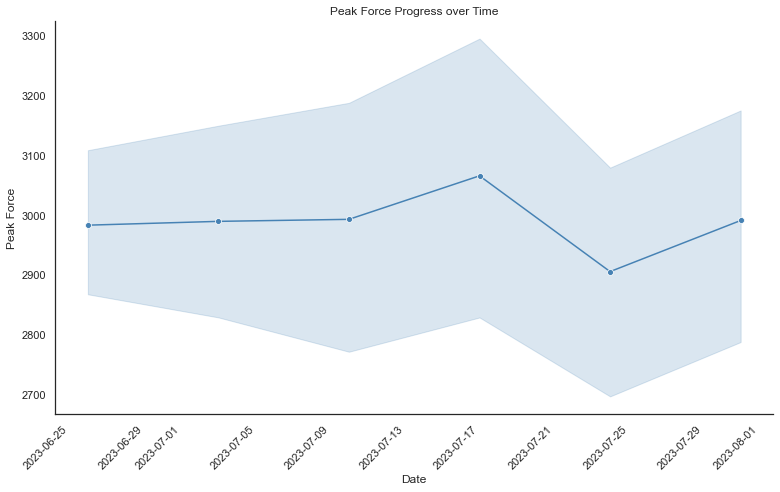

In [129]:
# peak force visual
sns.set(style = "white")
plt.figure(figsize = (11, 7))

ax = sns.lineplot(x = 'Date', y = 'Peak Force', data = ISO, marker = 'o', color = "steelblue" )

sns.despine()

plt.xlabel('Date')
plt.ylabel('Peak Force')
plt.title('Peak Force Progress over Time')
plt.xticks(rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()

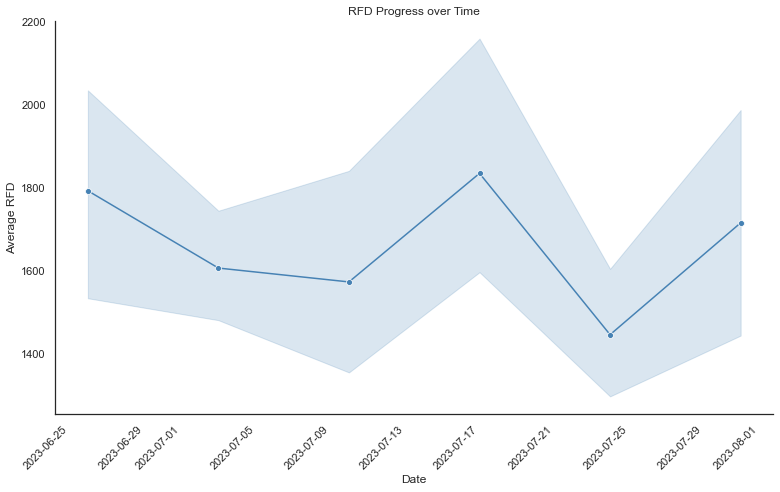

In [130]:
# RFD visual
ISO['Average RFD'] = ISO['Peak Force'] / ISO['Time to Peak Force']

sns.set(style = "white")
plt.figure(figsize = (11, 7))

ax = sns.lineplot(x = 'Date', y = 'Average RFD', data = ISO, marker = 'o', color = "steelblue" )

sns.despine()

plt.xlabel('Date')
plt.ylabel('Average RFD')
plt.title('RFD Progress over Time')
plt.xticks(rotation = 45, ha = 'right')

plt.tight_layout()
plt.show()


For the Isometric Test, mean `Peak Force` and `RFD` spike in mid-July and late July, but remain mostly constant throughout the duration of the training program.

Understanding trends in target variables is important to note. Once signficant predictor variables are identified and visualized, they should ideally trend in a similar fashion.

Viewing correlations to see if there are any strong linear relationships between feature types.

In [50]:
# drop jump correlation matrix
corr_DJ = DJ.corr()
corr_DJ

,Segment,Excluded,Tags,System Weight,Drop Height,Jump Height,Spring Like Correlation,Time to Peak Braking Force,Stiffness,mRSI,...,Right Force at Peak Landing Force,L|R Avg. Landing Force,Left Avg. Landing Force,Right Avg. Landing Force,L|R Landing Impulse Index,Avg. Braking Velocity,Avg. Propulsive Velocity,Countermovement Depth,Right Force at Peak Braking Force,Left Force at Peak Braking Force
Segment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excluded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
System Weight,NaN,NaN,NaN,1.000000,NaN,-0.197057,0.171532,0.289068,-0.045827,-0.272614,...,-0.249538,0.129364,0.367613,0.275022,0.347238,0.004177,-0.218704,NaN,0.231486,0.342440
Drop Height,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Avg. Braking Velocity,NaN,NaN,NaN,0.004177,NaN,-0.071516,0.430175,-0.459994,0.522491,-0.297055,...,0.109910,-0.019139,-0.025406,-0.083762,-0.035636,1.000000,-0.114579,NaN,-0.189595,-0.350626
Avg. Propulsive Velocity,NaN,NaN,NaN,-0.218704,NaN,0.963635,-0.904963,0.142695,-0.009708,0.933508,...,0.235491,0.118785,0.129526,-0.030738,0.061521,-0.114579,1.000000,NaN,-0.295905,-0.213850
Countermovement Depth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Right Force at Peak Braking Force,NaN,NaN,NaN,0.231486,NaN,-0.356318,0.178856,-0.350118,-0.583838,-0.112773,...,-0.314827,0.090792,0.023218,-0.109513,0.545337,-0.189595,-0.295905,NaN,1.000000,0.564181


A correlation matrix for the entire dataset is too large to effectively read. I'll be removing identifier variables and viewing only the strongest correlations with the target variables now.

In [94]:
# testing correlations for jump height 
corr_jump = DJ.corr()['Jump Height'].abs().dropna()
sorted_corr_jump = corr_jump.sort_values(ascending = False)[1:26]
print(sorted_corr_jump)

Takeoff Velocity                   0.976280
Peak Velocity                      0.974841
Relative Propulsive Net Impulse    0.974652
Net Impulse Ratio                  0.973161
Relative Propulsive Impulse        0.967102
Avg. Propulsive Velocity           0.963635
Avg. Relative Propulsive Power     0.932297
Jump Momentum                      0.926154
Propulsive Net Impulse             0.922590
Peak Relative Propulsive Power     0.921272
Avg. Propulsive Power              0.915372
mRSI                               0.909036
Peak Propulsive Power              0.905024
Propulsive Impulse                 0.883195
Spring Like Correlation            0.803676
Positive Net Impulse               0.685072
Flight Time                        0.625493
Avg. Relative Propulsive Force     0.621083
Positive Impulse                   0.617806
Propulsive Phase                   0.594756
Avg. Propulsive Force              0.514388
Left Avg. Propulsive Force         0.494946
Contact Time                    

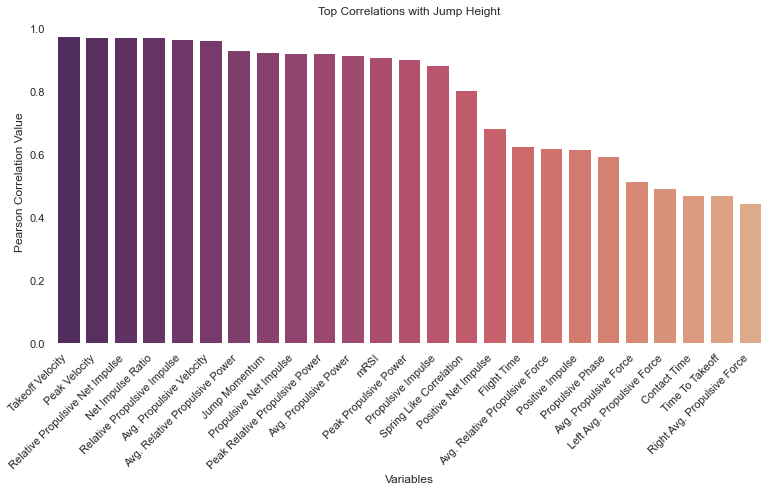

In [102]:
# visualizing jump height correlations
sns.set(style = "white")
plt.figure(figsize = (11, 7))

ax = sns.barplot(x = sorted_corr_jump.index, y = sorted_corr_jump.values, palette = "flare_r")
sns.despine(left = True, bottom = True)

plt.xlabel('Variables')
plt.ylabel('Pearson Correlation Value')
plt.title('Top Correlations with Jump Height')
plt.xticks(rotation = 45, ha = 'right') 
plt.tight_layout()

plt.show()

The strongest linear associations to `Jump Height` are measures relating to propulsion (i.e. `Takeoff Velocity`, Propulsive Impulse, Velocity, Power, `Jump Momentum`, `Spring Like Correlation`). 
Now checking RSI correlations.

In [96]:
# testing correlations for RSI 
corr_RSI = DJ.corr()['RSI'].abs().dropna()
sorted_corr_RSI = corr_RSI.sort_values(ascending = False)[1:26]
print(sorted_corr_RSI)

Avg. Braking RFD                        0.905425
Stiffness                               0.895868
Left Avg. Braking RFD                   0.895816
Right Avg. Braking RFD                  0.890346
Relative Force At Min Displacement      0.878397
Peak Relative Propulsive Force          0.871798
Force At Min Displacement               0.861791
Avg. Relative Braking Power             0.857511
Peak Propulsive Force                   0.855723
Avg. Relative Braking Force             0.842492
Contact Time                            0.831055
Time To Takeoff                         0.831055
Right Force at Peak Propulsive Force    0.826477
Left Force at Peak Propulsive Force     0.814347
Avg. Braking Power                      0.796007
Relative Braking Impulse                0.795843
Propulsive Phase                        0.790100
Braking Phase                           0.788523
Avg. Braking Force                      0.786613
Left Avg. Braking Force                 0.717008
Right Avg. Braking F

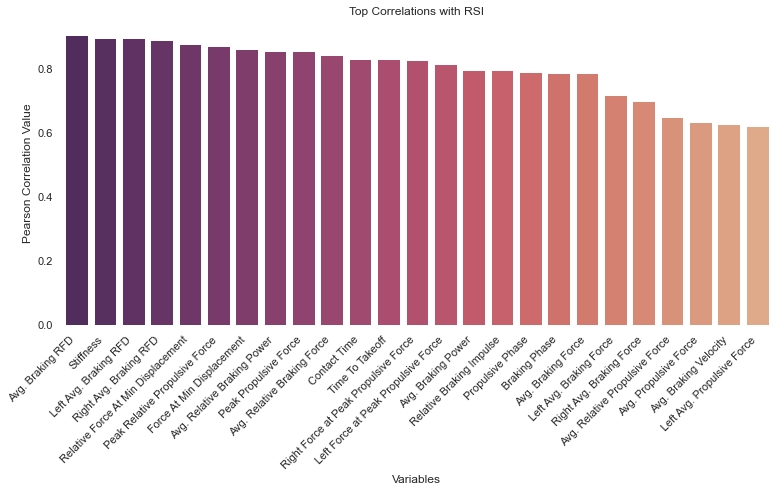

In [97]:
# visualizing RSI correlations
sns.set(style = "white")
plt.figure(figsize = (11, 7))

ax = sns.barplot(x = sorted_corr_RSI.index, y = sorted_corr_RSI.values, palette = "flare_r")
sns.despine(left = True, bottom = True)

plt.xlabel('Variables')
plt.ylabel('Pearson Correlation Value')
plt.title('Top Correlations with RSI')
plt.xticks(rotation = 45, ha = 'right') 
plt.tight_layout()

plt.show()

When viewing correlations to `RSI`, measures relating to force timings are strongest (i.e. `Avg. Braking RFD`, `Time to Takeoff`, as well as `Stiffness`). I didn't include measures relating to `Contact Time` since RSI is based off Jump Height to Contact Time.

In [53]:
# isometric test correlation matrix
corr_ISO = ISO.corr()
corr_ISO

,Segment,Excluded,System Weight,Initiation Threshold,Peak Force,Net Peak Force,Relative Peak Force,Relative Peak Force (BW),L|R Peak Force,Left Peak Force,...,Net Force at 250 ms,Relative Force at 250 ms,Relative Force at 250 ms (BW),RFD 0-250 ms,Left Force at 250 ms,Right Force at 250 ms,Impulse 0-250ms,Net Impulse 0-250ms,Length of Pull,Time to Peak Force
Segment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excluded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
System Weight,NaN,NaN,1.000000,0.100411,0.526555,0.405204,0.083428,-0.091820,-0.146713,0.394583,...,0.372208,0.226848,0.117153,0.369569,0.470687,0.502432,0.472532,0.115498,0.061588,0.134863
Initiation Threshold,NaN,NaN,0.100411,1.000000,-0.036287,-0.055193,-0.093109,-0.065696,0.035273,-0.015517,...,0.100172,0.094126,0.113410,0.058064,0.106601,0.101811,0.233009,0.220739,-0.448514,-0.115122
Peak Force,NaN,NaN,0.526555,-0.036287,1.000000,0.990583,0.889819,0.767713,-0.069195,0.873182,...,0.471187,0.423602,0.322071,0.474216,0.466989,0.532784,0.485160,0.327196,0.248791,0.128652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Right Force at 250 ms,NaN,NaN,0.502432,0.101811,0.532784,0.492033,0.356444,0.281838,-0.104774,0.429884,...,0.935920,0.898498,0.852303,0.934815,0.816156,1.000000,0.713685,0.594822,0.048882,0.140708
Impulse 0-250ms,NaN,NaN,0.472532,0.233009,0.485160,0.445634,0.320485,0.283815,-0.013437,0.425258,...,0.666685,0.625929,0.596446,0.658784,0.615241,0.713685,1.000000,0.929992,-0.154475,-0.111880
Net Impulse 0-250ms,NaN,NaN,0.115498,0.220739,0.327196,0.333260,0.326415,0.358178,0.046047,0.314725,...,0.596164,0.610856,0.623378,0.588360,0.497109,0.594822,0.929992,1.000000,-0.199792,-0.182347
Length of Pull,NaN,NaN,0.061588,-0.448514,0.248791,0.257627,0.259219,0.238008,-0.061532,0.190151,...,0.014852,0.000324,-0.020962,0.034119,-0.001895,0.048882,-0.154475,-0.199792,1.000000,0.226149


Interestingly, there does not seem to be an average RFD for peak force, so I'll create that variable and test correlations.

In [98]:
# average RFD
ISO['Average RFD'] = ISO['Peak Force'] / ISO['Time to Peak Force']

# top correlations for peak force
corr_PF = ISO.corr()['Peak Force'].abs().dropna()
sorted_corr_PF = corr_PF.sort_values(ascending = False)[1:26]
print(sorted_corr_PF)

Net Peak Force                 0.990583
Right Peak Force               0.893638
Relative Peak Force            0.889819
Left Peak Force                0.873182
Relative Peak Force (BW)       0.767713
Relative Force at 0 ms (BW)    0.589188
Force at 200 ms                0.548007
Right Force at 250 ms          0.532784
System Weight                  0.526555
Force at 250 ms                0.523632
Left Force at 200 ms           0.517892
Right Force at 200 ms          0.508300
Force at 0 ms                  0.494742
Impulse 0-250ms                0.485160
RFD 0-250 ms                   0.474216
Net Force at 250 ms            0.471187
Left Force at 250 ms           0.466989
RFD 0-200 ms                   0.462276
Net Force at 200 ms            0.460555
Relative Force at 250 ms       0.423602
Right Force at 0 ms            0.411023
Relative Force at 200 ms       0.397866
Force at 150 ms                0.382560
Impulse 0-200ms                0.371988
Right Force at 150 ms          0.358429


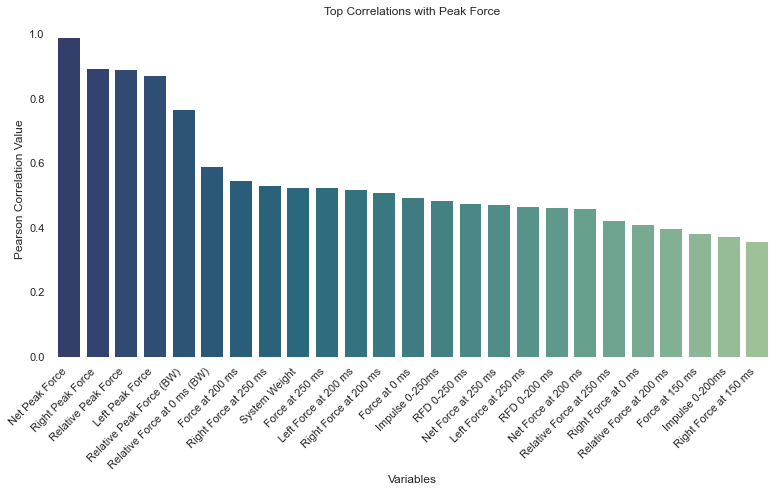

In [99]:
# visualizing peak force correlations
sns.set(style = "white")
plt.figure(figsize = (11, 7))

ax = sns.barplot(x = sorted_corr_PF.index, y = sorted_corr_PF.values, palette = "crest_r")
sns.despine(left = True, bottom = True)

plt.xlabel('Variables')
plt.ylabel('Pearson Correlation Value')
plt.title('Top Correlations with Peak Force')
plt.xticks(rotation = 45, ha = 'right') 
plt.tight_layout()

plt.show()

In [100]:
# top correlations for average RFD
corr_RFD = ISO.corr()['Average RFD'].abs().dropna()
sorted_corr_RFD = corr_RFD.sort_values(ascending = False)[1:26]
print(sorted_corr_RFD)

Time to Peak Force          0.849986
Right Force at 150 ms       0.389636
Right Force at 100 ms       0.388097
Force at 150 ms             0.378996
Force at 100 ms             0.370769
Net Force at 150 ms         0.368001
RFD 0-150 ms                0.367906
Impulse 0-200ms             0.367371
Impulse 0-150ms             0.355998
Net Impulse 0-200ms         0.350243
RFD 0-100 ms                0.349952
Right Peak Force            0.348813
Net Force at 100 ms         0.346189
Relative Force at 150 ms    0.343585
Net Peak Force              0.342798
Peak Force                  0.335371
Relative Peak Force (BW)    0.334096
Relative Peak Force         0.332033
Net Impulse 0-150ms         0.329231
Relative Force at 100 ms    0.319482
Impulse 0-250ms             0.310229
Net Impulse 0-250ms         0.303413
Right Force at 50 ms        0.302957
Impulse 0-100ms             0.302713
Left Force at 100 ms        0.290470
Name: Average RFD, dtype: float64


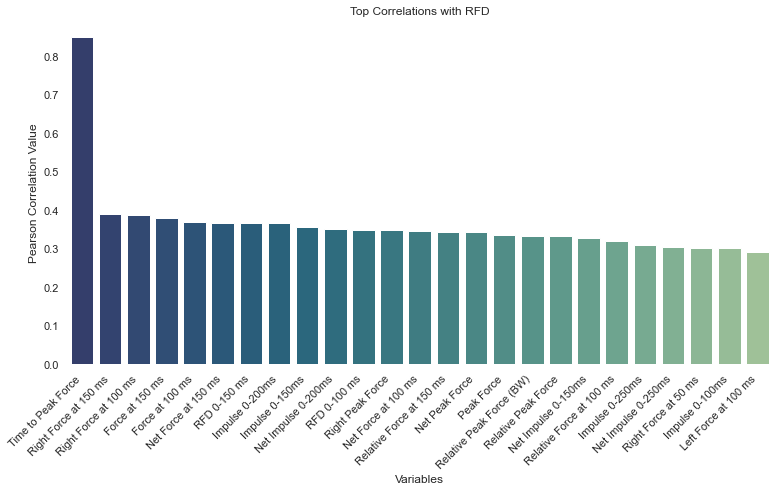

In [101]:
# visualizing RFD correlations
sns.set(style = "white")
plt.figure(figsize = (11, 7))

ax = sns.barplot(x = sorted_corr_RFD.index, y = sorted_corr_RFD.values, palette = "crest_r")
sns.despine(left = True, bottom = True)

plt.xlabel('Variables')
plt.ylabel('Pearson Correlation Value')
plt.title('Top Correlations with RFD')
plt.xticks(rotation = 45, ha = 'right') 
plt.tight_layout()

Checking for just strong linear relationships did not reveal much, so I expanded the range of top correlations. For both variables, maintaining strong force at the later stages of the lift (150-250ms) is a good predictor for overall peak force and RFD. Right force is also predictably higher than left force in predicting total force output (standard dominant side imbalances).

Now I'll build baseline models to predict the target metrics. The idea is that by optimizing the model, it gives insight into related variables that play the largest role in influencing the target metrics. This can be useful when tempering / managing athlete training in-season to maximize peak performance for the right moments.

## Modeling

Since the target variables are all numeric, the planned approach to modeling involves regression analysis. I'll begin with a linear model approach, using Multiple Linear Regression in scikit-learn to further evaluate the strength of the features' linear relationships with the targets. Then, I'll use a Decision Tree to optimize the model performance and re-assess feature importance. The idea behind a multi-faceted modeling approach is that it offers different perspectives in testing predictor relationships to the response.

Fitting a linear model necessitates the data meets the following assumptions:

**Linearity**

The spread of the points is mostly equally distributed above and below the line.

**Constant Variance**

In the fitted values vs. residuals plot, the y-axis spread (ie. the resiuals variance) is mostly the same moving from left to right.

**Normality of Residuals**

The histogram of the residuals below is symmetric and centered around 0.

**Independence**

Observations are independent of each other, residuals should not exhibit any clear patterns or trends over time.

**Multicolinearity**

Predictor variables should not be highly correlated with each other, final predictors should exhibit low VIF (Variance Inflation Factor).

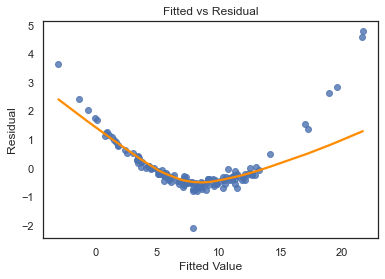

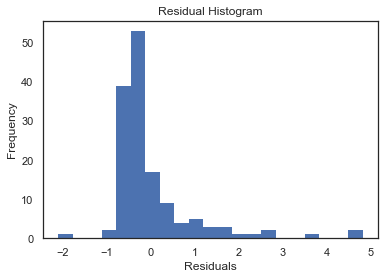

                          Features          VIF
0                    Peak Velocity  2929.299761
1  Relative Propulsive Net Impulse  3852.287896
2                    Jump Momentum   172.102837
3                             mRSI    48.086566
4                      Flight Time    33.412654


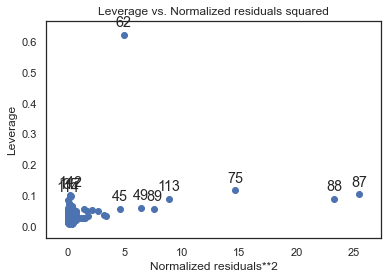

In [139]:
# modeling imports
import statsmodels.api as sm

# setting feature matrix and target variable
X = DJ[['Peak Velocity', 'Relative Propulsive Net Impulse', 'Jump Momentum', 'mRSI', 'Flight Time']]
y = DJ['Jump Height']

# regression model
mod1 = sm.OLS(y, sm.add_constant(X)).fit()

# fitted vs residual plot (linearity and constant variance)
sns.regplot(x = mod1.fittedvalues, y = mod1.resid, lowess = True, line_kws = {'color': "darkorange"})
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

# residual histogram (normality and inde"pendence)
plt.hist(mod1.resid, bins = 21, edgecolor = "none")
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()

# VIF (multicolinearity)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

# leverage residual-squared plot (outliers and influential points)
sm.graphics.plot_leverage_resid2(mod1)
plt.show()
